Датасет - https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import roc_auc_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
%matplotlib inline

In [63]:
df = pd.read_csv('../data/spam.csv', encoding='latin-1')[['v1','v2']]
df.rename(columns = {'v1' :'label','v2':'sms'}, inplace = True)
df['label'] = df['label'].map({'spam' : 1, 'ham' : 0})
df.head()

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Распределеие классов

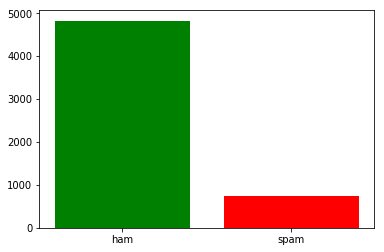

In [64]:
_, ax = plt.subplots()
plt.bar(np.arange(2), df['label'].value_counts(), color = ['green', 'red'])
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['ham', 'spam']);

### Распределение по длине смс

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


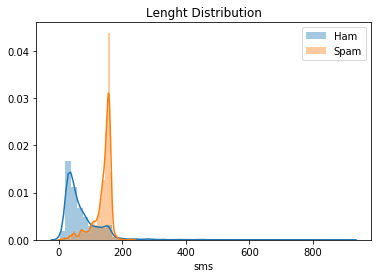

In [65]:
s1 = df[df['label'] == 0]['sms'].str.len()
sns.distplot(s1, label='Ham')
s2 = df[df['label'] == 1]['sms'].str.len()
sns.distplot(s2, label='Spam')
plt.title('Lenght Distribution')
plt.legend()

In [66]:
target = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(df, target, 
                                                    test_size = 0.2, stratify = target, random_state = 10)
X_train.shape, X_test.shape

((4457, 2), (1115, 2))

## CountVectorizer

In [67]:
vect = CountVectorizer(stop_words = 'english')
X_train_vect = vect.fit_transform(X_train['sms']).todense()
X_test_vect = vect.transform(X_test['sms']).todense()

## TfIdf



In [68]:
vect_tfidf = TfidfVectorizer(stop_words = 'english')
X_train_tfidf = vect_tfidf.fit_transform(X_train['sms']).todense()
X_test_tfidf = vect_tfidf.transform(X_test['sms']).todense()

## models

In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

In [70]:
clfs = {
    'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
    'svm1': SVC(kernel='linear'),
    'svm2': SVC(kernel='rbf'),
    'svm3': SVC(kernel='sigmoid'),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}


In [71]:
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(X_train_vect, y_train)
    y_pred = clf.predict(X_test_vect)
    f1_scores[clf_name] = f1_score(y_pred, y_test)

mnb
gnb
svm1
svm2


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


svm3


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


ada
dtc
rfc


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


gbc
lr


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
f1_scores

{'mnb': 0.9634551495016611,
 'gnb': 0.6826923076923077,
 'svm1': 0.9469964664310955,
 'svm2': 0.0,
 'svm3': 0.0,
 'ada': 0.8540145985401459,
 'dtc': 0.875,
 'rfc': 0.8823529411764706,
 'gbc': 0.8404669260700389,
 'lr': 0.9280575539568345}

**Multinomial naive bayes  справляется лучше всех с этой задачей**

In [73]:
clf = MultinomialNB()
clf.fit(X_train_df, y_train)
y_pred = clf.predict(X_test_df)
f1_score(y_pred, y_test)

0.9634551495016611

### Попробуем tfidf

In [74]:
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    f1_scores[clf_name] = f1_score(y_pred, y_test)

mnb
gnb
svm1
svm2


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


svm3


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


ada
dtc
rfc
gbc
lr


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
f1_scores

{'mnb': 0.8962962962962964,
 'gnb': 0.6715328467153284,
 'svm1': 0.9553264604810996,
 'svm2': 0.0,
 'svm3': 0.0,
 'ada': 0.8642857142857143,
 'dtc': 0.8758620689655171,
 'rfc': 0.8832116788321168,
 'gbc': 0.8174603174603174,
 'lr': 0.8517110266159695}

**Multinomial naive bayes здесь также выигрывает**

## Попробуем Fasttext

In [87]:
train_FF = X_train.copy()
train_FF['label'] = '__label__' + train_FF['label'].astype(str)

test_FF = X_test.copy()
test_FF['label'] = '__label__' + test_FF['label'].astype(str)

train_FF.to_csv('train_FF.txt', index=False, sep=' ', header=False)
test_FF.to_csv('test_FF.txt', index=False, sep=' ', header=False)

~/fastText/fasttext supervised -input train_FF.txt -output model_FF  <br>
~/fastText/fasttext test model_FF.bin test_FF.txt

N	1115
P@1	0.983
R@1	0.983

In [88]:
2*(0.983*0.983)/(0.983+0.983)

0.983

Для Fasttext получили f1_score = 0.98. Кажется, что можно использовать ff в качестве основной модели